In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, UpSampling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Rescale input data to range [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


In [3]:
# Reshape input data to 4D tensor with shape (batch_size, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Print dataset information
print('Training set shape:', x_train.shape)
print('Testing set shape:', x_test.shape)

Training set shape: (60000, 28, 28, 1)
Testing set shape: (10000, 28, 28, 1)


In [4]:
# Build autoencoder model
input_img = Input(shape=(28,28,1))
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

In [5]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [6]:
# Train autoencoder model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))


Epoch 1/10
1875/1875 [==============================] - 43s 17ms/step - loss: 0.0967 - val_loss: 0.0763
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0742 - val_loss: 0.0718
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0712 - val_loss: 0.0698
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0697 - val_loss: 0.0688
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0687 - val_loss: 0.0678
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0680 - val_loss: 0.0674
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0674 - val_loss: 0.0668
Epoch 8/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0670 - val_loss: 0.0663
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0667 - val_loss: 0.0662
Epoch 10/10
1875/1875 [==============================] - 18s 9ms/s

In [7]:
# Extract features from input data using the trained autoencoder
encoder = Model(input_img, encoded)
x_train_features = encoder.predict(x_train)
x_test_features = encoder.predict(x_test)

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

313/313 [==============================] - 1s 3ms/step


In [8]:
# Build CNN model
model = Sequential()
model.add(Flatten(input_shape=(4,4,128))) # Input shape is (batch_size, height, width, channels) after feature extraction
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train the model
history = model.fit(x_train_features, y_train, epochs=10, batch_size=32, validation_data=(x_test_features, y_test))


Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.3073 - accuracy: 0.9066 - val_loss: 0.0771 - val_accuracy: 0.9754
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1662 - accuracy: 0.9496 - val_loss: 0.0546 - val_accuracy: 0.9815
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1418 - accuracy: 0.9562 - val_loss: 0.0653 - val_accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1289 - accuracy: 0.9610 - val_loss: 0.0539 - val_accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1149 - accuracy: 0.9642 - val_loss: 0.0628 - val_accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1098 - accuracy: 0.9657 - val_loss: 0.0484 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1010 - accuracy: 0.9684 - val_loss: 0.0433 - val_accu

In [11]:
# Print training and testing accuracy
train_acc = history

True label: 1
1/1 [==============================] - 0s 152ms/step
Predicted label: 1


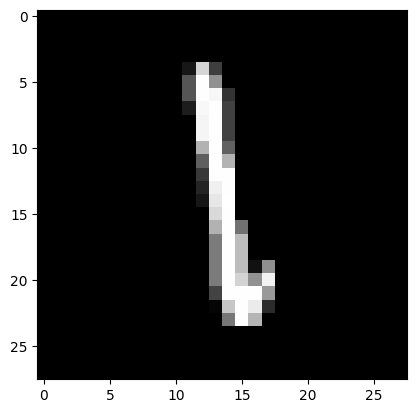

Input image:
1/1 [==============================] - 1s 706ms/step


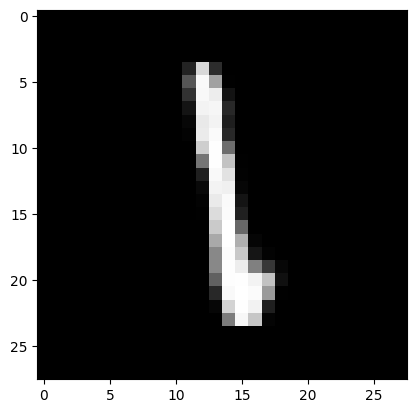

Reconstructed image using autoencoder:


In [12]:
# Select a random image from test set and predict its label
import random

index = random.randint(0, x_test.shape[0]-1)
img = x_test[index]
label = y_test[index]
print('True label:', np.argmax(label))

# Reshape input data to 4D tensor with shape (1, height, width, channels)
img = img.reshape(1, 28, 28, 1)

# Extract features from input image using the trained autoencoder
img_features = encoder.predict(img)

# Predict label using the trained CNN model
prediction = model.predict(img_features)[0]
print('Predicted label:', np.argmax(prediction))

# Display the input image
plt.imshow(x_test[index], cmap='gray')
plt.show()
print('Input image:')
plt.show()

# Display the reconstructed image using the trained autoencoder
reconstructed_img = autoencoder.predict(img)
plt.imshow(reconstructed_img[0], cmap='gray')
plt.show()
print('Reconstructed image using autoencoder:')